In [14]:
import os
import time

import pandas as pd

import matplotlib.pyplot as plt
import tensorflow.keras as keras

In [2]:
LOGDIR = os.path.join(os.curdir, "tensorboard", "cifar10")

# Generate directory name for tensorboard
def tensorboard_logdir():
    return os.path.join(LOGDIR, str(int(time.time())))

# CIFAR10 Dataset

This is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories.

**Categories**
0 -> airplane
1 -> automobile
2 -> bird
3 -> cat
4 -> deer
5 -> dog
6 -> frog
7 -> horse
8 -> ship
9 -> truck

In [3]:
# Category labels
categories = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

In [4]:
# Load dataset from keras
dataset = keras.datasets.cifar10.load_data()

In [5]:
# Split dataset
(x_train, y_train), (x_test, y_test) = dataset

# Verify dimensions
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

In [6]:
# Plot CIFAR10 images
def plot_images(x_arr, y_arr):
    fig = plt.figure(figsize=(5, 5))
    columns = 3
    rows = len(x_arr) // columns if len(x_arr) % columns == 0 else len(x_arr) // columns + 1

    for i in range(len(x_arr)):
        fig.add_subplot(rows, columns, i + 1)
        plt.imshow(x_arr[i])
        plt.axis('off')
        plt.title(categories[y_arr[i][0]])

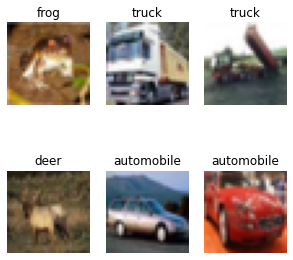

In [7]:
plot_images(x_train[0:6], y_train[0:6])

In [8]:
x_train[0].shape

(32, 32, 3)

In [9]:
# Model type A

keras.backend.clear_session()  # Clear session

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax", name="output_layer"))

optimizerA = keras.optimizers.Nadam(learning_rate=5e-5)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizerA, metrics=["accuracy"])

2022-01-28 19:16:01.602459: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-28 19:16:01.605121: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 12. Tune using inter_op_parallelism_threads for best performance.


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               307300    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               1

In [11]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint(os.path.join(LOGDIR, "cifar10_model.h5"), save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(tensorboard_logdir(), profile_batch=0)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

In [12]:
history = model.fit(x_train, y_train, epochs=100, validation_split=0.1, callbacks=callbacks)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
45000/45000 [==============================] - 41s 909us/sample - loss: 5.1141 - accuracy: 0.1587 - val_loss: 2.2513 - val_accuracy: 0.1964
Epoch 2/100
45000/45000 [==============================] - 27s 607us/sample - loss: 2.1182 - accuracy: 0.2194 - val_loss: 2.0388 - val_accuracy: 0.2468
Epoch 3/100
45000/45000 [==============================] - 27s 605us/sample - loss: 1.9992 - accuracy: 0.2569 - val_loss: 1.9644 - val_accuracy: 0.2722
Epoch 4/100
45000/45000 [==============================] - 27s 611us/sample - loss: 1.9248 - accuracy: 0.2941 - val_loss: 1.9706 - val_accuracy: 0.2712
Epoch 5/100
45000/45000 [==============================] - 27s 604us/sample - loss: 1.8665 - accuracy: 0.3181 - val_loss: 1.8938 - val_accuracy: 0.3170
Epoch 6/100
45000/45000 [==============================] - 27s 596us/sample - loss: 1.8158 - accuracy: 0.3413 - val_loss: 1.8322 - val_accuracy: 0.3434
Epoch 7/100
45000/45000 [==============

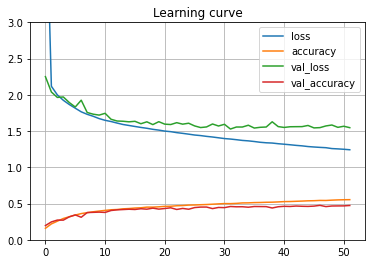

In [19]:
pd.DataFrame(history.history).plot()
plt.title("Learning curve")
plt.grid(True)
plt.gca().set_ylim((0,3))
plt.show()

In [21]:
dir(history)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_chief_worker_only',
 '_keras_api_names',
 '_keras_api_names_v1',
 'epoch',
 'history',
 'model',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_predict_batch_begin',
 'on_predict_batch_end',
 'on_predict_begin',
 'on_predict_end',
 'on_test_batch_begin',
 'on_test_batch_end',
 'on_test_begin',
 'on_test_end',
 'on_train_batch_begin',
 'on_train_batch_end',
 'on_train_begin',
 'on_train_end',
 'params',
 'set_model',
 'set_params',
 'validation_data']

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])